# Exercises

### Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
# for angry pink message
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.linear_model import LinearRegression

import viz

In [3]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [4]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [6]:
df = df.drop(columns = ["sex", "smoker", "day", "time", "size"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
dtypes: float64(2)
memory usage: 5.7 KB


In [8]:
df.head()

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61


In [9]:
# creating DataFrame for X (features) and Series for y (target)
# X = pd.DataFrame(df.total_bill)
# y = df.tip

# concatenating y Series to X DataFrame
# tips_ready = pd.concat([X, y], axis = 1)

In [10]:
# tips_ready.head()

In [11]:
X = df[['total_bill']]
y = df[['tip']]

In [12]:
X

,total_bill
1,16.99
2,10.34
3,21.01
4,23.68
5,24.59
...,...
240,29.03
241,27.18
242,22.67
243,17.82


In [13]:
y

,tip
1,1.01
2,1.66
3,3.50
4,3.31
5,3.61
...,...
240,5.92
241,2.00
242,2.00
243,1.75


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

### Here is some sample code to get you started:

- from sklearn.linear_model import LinearRegression

- assuming X and y are already defined
- model = LinearRegression().fit(X, y)
- predictions = model.predict(X)
### Modify and add to the code above as necessary for it to work with the tips dataset.

In [14]:
lrm = LinearRegression(normalize = True)

In [15]:
lrm = lrm.fit(X, y) # X = df[['total_bill']] # y = df.tip

In [16]:
# compute predictions and add to original dataframe
df['yhat'] = lrm.predict(X)
df

,total_bill,tip,yhat
1,16.99,1.01,2.704636
2,10.34,1.66,2.006223
3,21.01,3.50,3.126835
4,23.68,3.31,3.407250
5,24.59,3.61,3.502822
...,...,...,...
240,29.03,5.92,3.969131
241,27.18,2.00,3.774836
242,22.67,2.00,3.301175
243,17.82,1.75,2.791807


In [17]:
df['yhat_baseline'] = df['tip'].mean()

- tip = Actual target
- yhat = OLS model prediction

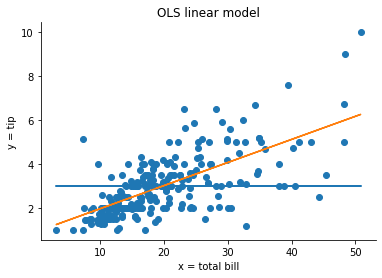

In [18]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.total_bill, df.tip)
plt.plot(df.total_bill, df.yhat_baseline)
plt.plot(df.total_bill, df.yhat)
plt.xlabel('x = total bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

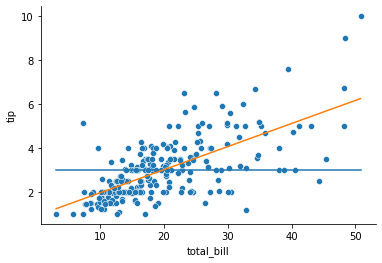

In [19]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat_baseline', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat', data = df)

### 3. Plot the residuals for the linear regression model that you made.

In [20]:
df.head()

,total_bill,tip,yhat,yhat_baseline
1,16.99,1.01,2.704636,2.998279
2,10.34,1.66,2.006223,2.998279
3,21.01,3.50,3.126835,2.998279
4,23.68,3.31,3.407250,2.998279
5,24.59,3.61,3.502822,2.998279


In [21]:
# compute residuals
df['residual'] = df['yhat']- df['tip']
df['residual_baseline'] = df['yhat_baseline']- df['tip']

In [22]:
df.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279
2,10.34,1.66,2.006223,2.998279,0.346223,1.338279
3,21.01,3.50,3.126835,2.998279,-0.373165,-0.501721
4,23.68,3.31,3.407250,2.998279,0.097250,-0.311721
5,24.59,3.61,3.502822,2.998279,-0.107178,-0.611721


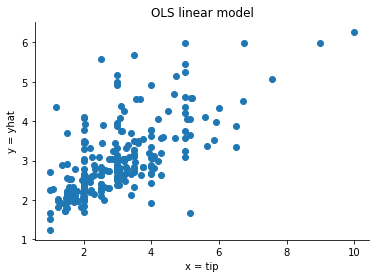

In [23]:
# tip vs prediction tips from model(yhat)
plt.scatter(df.tip, df.yhat)
#plt.plot(df.tip, df.yhat)
plt.xlabel('x = tip')
plt.ylabel('y = yhat')
plt.title('OLS linear model');

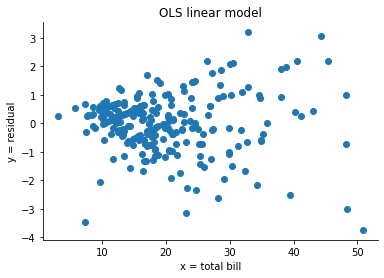

In [24]:
# Residual vs 
plt.scatter(df.total_bill, df.residual)
#plt.plot(df.total_bill, df.residual)
plt.xlabel('x = total bill')
plt.ylabel('y = residual')
plt.title('OLS linear model');

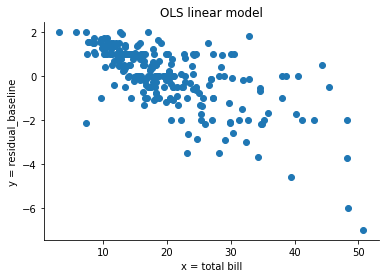

In [25]:
# Residual vs 
plt.scatter(df.total_bill, df.residual_baseline)
# plt.plot(df.total_bill, df.residual_baseline)
plt.xlabel('x = total bill')
plt.ylabel('y = residual_baseline')
plt.title('OLS linear model');

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [26]:
# square of each residual value
df['residual^2'] = df.residual**2
df['residual_baseline^2'] = df.residual_baseline**2
df.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724
4,23.68,3.31,3.407250,2.998279,0.097250,-0.311721,0.009458,0.097170
5,24.59,3.61,3.502822,2.998279,-0.107178,-0.611721,0.011487,0.374203


In [27]:
# SSE
SSE = sum(df['residual^2'])
SSE

252.78874385077594

In [28]:
df['Explained']=df['yhat']-df['yhat_baseline']
df.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2,Explained
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252,-0.293643
2,10.34,1.66,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990,-0.992056
3,21.01,3.50,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724,0.128556
4,23.68,3.31,3.407250,2.998279,0.097250,-0.311721,0.009458,0.097170,0.408971
5,24.59,3.61,3.502822,2.998279,-0.107178,-0.611721,0.011487,0.374203,0.504544


In [30]:
from math import sqrt
df['Explained']=df['yhat']-df['yhat_baseline']
df['Explained_Square'] = df.Explained**2
ESS = sum(df.Explained_Square)
SSE_baseline = sum(df['residual_baseline^2'])
TSS = SSE_baseline 
MSE = df['residual^2'].mean()
RMSE = sqrt(MSE)

In [31]:
# ESS
df['Explained_Square'] = df.Explained**2
df.head()


,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2,Explained,Explained_Square
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252,-0.293643,0.086226
2,10.34,1.66,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990,-0.992056,0.984174
3,21.01,3.50,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724,0.128556,0.016527
4,23.68,3.31,3.407250,2.998279,0.097250,-0.311721,0.009458,0.097170,0.408971,0.167258
5,24.59,3.61,3.502822,2.998279,-0.107178,-0.611721,0.011487,0.374203,0.504544,0.254564


In [32]:
# Explained Sum of Squares
ESS = sum(df.Explained_Square)
ESS

212.42373319840442

In [33]:
# TSS
SSE_baseline = sum(df['residual_baseline^2'])
TSS = SSE_baseline 
TSS

465.21247704918073

In [34]:
#MSE
MSE = df['residual^2'].mean()
MSE

1.036019442011377

In [35]:
from math import sqrt
# Root Mean Squared Error
RMSE = sqrt(MSE)
RMSE

1.0178504025697377

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [34]:
# SSE_baseline
SSE_baseline = df['residual_baseline^2'].sum()
SSE_baseline

465.21247704918045

In [35]:
# SSE_baseline
SSE_baseline = df['residual_baseline^2'].sum()
# MSE_baseline (Mean Squared Error)
MSE_baseline = df['residual_baseline^2'].mean()
#RMSE_baseline
RMSE_baseline = sqrt(MSE_baseline)

In [36]:
# MSE_baseline (Mean Squared Error)
MSE_baseline = df['residual_baseline^2'].mean()
MSE_baseline

1.9066085124966412

In [37]:
#RMSE_baseline
RMSE_baseline = sqrt(MSE_baseline)
RMSE_baseline

1.3807999538298954

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [38]:
def compare(df):
    lrm = LinearRegression(normalize = True)
    lrm = lrm.fit(X, y)
    df['yhat'] = lrm.predict(X)
    df['yhat_baseline'] = df['tip'].mean()
    # compute residuals
    df['residual'] = df['yhat']- df['tip']
    df['residual_baseline'] = df['yhat_baseline']- df['tip']
    # square of each residual value
    df['residual^2'] = df.residual**2
    df['residual_baseline^2'] = df.residual_baseline**2
    # SSE
    SSE = sum(df['residual^2'])
    # SSE baseline
    SSE_baseline = sum(df['residual_baseline^2'])
    print('SSE =', SSE)
    print('SSE_baseline =', SSE_baseline)
    if SSE < SSE_baseline:
        print('Your model performs better than baseline model')
    else:
        print('Your model does not perform better than baseline model')
   
    

In [39]:
compare(df)

SSE = 252.78874385077594
SSE_baseline = 465.21247704918073
Your model performs better than baseline model


### 7. What is the amount of variance explained in your model?

In [40]:
R2 = ESS/TSS
R2

0.45661658635167623

In [41]:
from sklearn.metrics import r2_score
r2_score(df.tip, df.yhat)

0.45661658635167657

### 8. Is your model better than the baseline model?

In [42]:
compare(df)

SSE = 252.78874385077594
SSE_baseline = 465.21247704918073
Your model performs better than baseline model


### 9. Create a file named evaluate.py that contains the following functions.

In [43]:
df.head(1)

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2,Explained,Explained_Square
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252,-0.293643,0.086226


- plot_residuals(y, yhat): creates a residual plot

In [44]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(y, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()


In [45]:
########################
def plot_residuals(y, yhat):
    lrm = LinearRegression(normalize = True)
    y = df[['tip']]
    df['yhat'] = lrm.predict(X)
    plt.plot(df.tip, df.yhat)

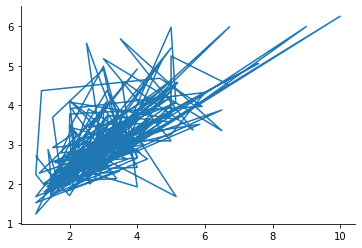

In [46]:
# plot_residuals(y, yhat):
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.array(df['tip'])
y = np.array(df['yhat'])

plt.plot(x, y)

plt.show()    

In [47]:
df.head(1)

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2,Explained,Explained_Square
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252,-0.293643,0.086226


- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)

In [48]:
def residuals(y, yhat):
    return y - yhat

def sse(y, yhat):
    return (residuals(y, yhat) **2).sum()

def mse(y, yhat):
    n = y.shape[0]
    return sse(y, yhat) / n

def rmse(y, yhat):
    return math.sqrt(mse(y, yhat))

def ess(y, yhat):
    return ((yhat - y.mean()) ** 2).sum()

def tss(y):
    return ((y - y.mean()) ** 2).sum()

def r2_score(y, yhat):
    return ess(y, yhat) / tss(y)

In [49]:
def regression_errors(y, yhat):
    return pd.Series({
        'sse': sse(y, yhat),
        'ess': ess(y, yhat),
        'tss': tss(y),
        'mse': mse(y, yhat),
        'rmse': rmse(y, yhat),
    })

In [50]:
#######################################
y = df.tip

In [51]:
def regression_errors(df):
    lrm = LinearRegression(normalize = True)
    lrm = lrm.fit(X, y)
    df['yhat'] = lrm.predict(X)
    df['yhat_baseline'] = df['tip'].mean()
    # compute residuals
    df['residual'] = df['yhat']- df['tip']
    df['residual_baseline'] = df['yhat_baseline']- df['tip']
    # square of each residual value
    df['residual^2'] = df.residual**2
    df['residual_baseline^2'] = df.residual_baseline**2
    # SSE
    SSE = sum(df['residual^2'])
    df['Explained']=df['yhat']-df['yhat_baseline']
    df['Explained_Square'] = df.Explained**2
    ESS = sum(df.Explained_Square)
    SSE_baseline = sum(df['residual_baseline^2'])
    TSS = SSE_baseline 
    MSE = df['residual^2'].mean()
    RMSE = sqrt(MSE)
    print('sum of squared errors (SSE) = ', SSE)
    print('explained sum of squares (ESS) = ', ESS)
    print('total sum of squares (TSS) = ', TSS)
    print('mean squared error (MSE) = ', MSE)
    print('root mean squared error (RMSE) = ', RMSE)
    

In [52]:
regression_errors(df)

sum of squared errors (SSE) =  252.78874385077594
explained sum of squares (ESS) =  212.42373319840442
total sum of squares (TSS) =  465.21247704918073
mean squared error (MSE) =  1.036019442011377
root mean squared error (RMSE) =  1.0178504025697377


- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [53]:
def baseline_mean_errors(y):
    yhat = y.mean()
    return {
        'sse': sse(y, yhat),
        'mse': mse(y, yhat),
        'rmse': rmse(y, yhat),
    }



In [54]:
##############################
def baseline_mean_errors(df):
    lrm = LinearRegression(normalize = True)
    lrm = lrm.fit(X, y)
    df['yhat_baseline'] = df['tip'].mean()
    # compute baseline residuals
    df['residual_baseline'] = df['yhat_baseline']- df['tip']
    # Square of baseline residuals
    df['residual_baseline^2'] = df.residual_baseline**2
    # SSE_baseline
    SSE_baseline = df['residual_baseline^2'].sum()
    # MSE_baseline (Mean Squared Error)
    MSE_baseline = df['residual_baseline^2'].mean()
    #RMSE_baseline
    RMSE_baseline = sqrt(MSE_baseline)

    

- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [55]:
def better_than_baseline(y, yhat):
    rmse_baseline = rmse(y, y.mean())
    rmse_model = rmse(y, yhat)
    return rmse_model < rmse_baseline

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [56]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [57]:
mpg = mpg.drop(columns = ['manufacturer', 'model', 'year', 'cyl', 'trans', 'drv', 'cty', 'fl', 'class'])

In [58]:
mpg = mpg.rename(columns={'displ': 'x', 'hwy': 'y'})

In [59]:
mpg.head()

,x,y
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26


In [60]:
mpg['yhat_baseline'] = mpg.y.mean()

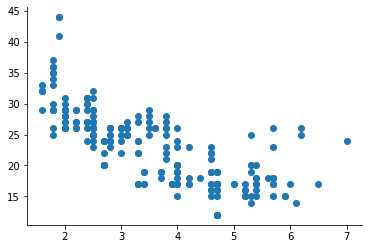

In [61]:
#plot displacement vs highway mpg

plt.scatter(mpg.x, mpg.y)

In [62]:
from sklearn.linear_model import LinearRegression

# create the model object
lm = LinearRegression(normalize=True)

# generate parameters, i.e. create model
lm = lm.fit(mpg[['x']], mpg.y)

# compute predictions and add to original dataframe
mpg['yhat'] = lm.predict(mpg[['x']])



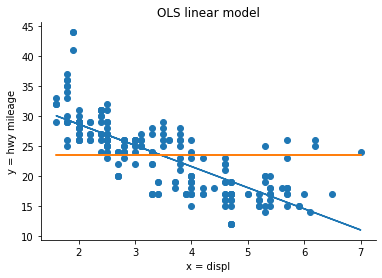

In [63]:
# visualize the line of best fit from OLS linear model
plt.scatter(mpg.x, mpg.y)
plt.plot(mpg.x, mpg.yhat)
plt.plot(mpg.x, mpg.yhat_baseline)
plt.xlabel('x = displ')
plt.ylabel('y = hwy mileage')
plt.title('OLS linear model');

In [64]:
# calculate regressions errors
import evaluate
import pandas as pd
import math
evaluate.regression_errors(mpg.y, mpg.yhat)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [67]:
# is our model better than baseline?

evaluate.better_than_baseline(mpg.y, mpg.yhat)

True

In [69]:
# R2 score

evaluate.r2_score(mpg.y, mpg.yhat)

0.5867866723989046

### My Style from Curricuum

In [ ]:
df = data('mpg')

In [ ]:
df.head()

In [ ]:
df = df.drop(columns = ['manufacturer', 'model', 'year', 'cyl', 'trans', 'drv', 'cty', 'fl', 'class'])

In [ ]:
df.head()

In [ ]:
df = df.rename(columns={'displ': 'x', 'hwy': 'y'})

In [ ]:
df.head()

In [ ]:
# Establishing a baseline
df['yhat_baseline'] = df['y'].mean()
df.head(3)

In [ ]:
# Build a Simple Model
from sklearn.linear_model import LinearRegression

# generate parameters, i.e. create model
ols_model = LinearRegression().fit(df[['x']], df.y)

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df[['x']])

df.head(3)

In [ ]:
x = df.x
y = df.yhat

In [ ]:
### TBA can you help me to make a graph of a line created from our model please

In [ ]:

plt.plot(df.x, df.yhat)
plt.xlabel('x = total _bill')
plt.ylabel('yhat = predicted tip')
plt.title('OLS linear model');

In [ ]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# compute residuals
df['residual'] = df['yhat'] - df['y']
df['residual_baseline'] = df['yhat_baseline'] - df['y']

In [ ]:
df.head()

In [ ]:
# square each residual value
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

In [ ]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

We can tell that our model is better than baseline.

In [ ]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

In [ ]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

### SK Learn 
### SSE

In [ ]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df.y, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.y, df.yhat_baseline)*len(df)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 

### MSE

In [ ]:
MSE2 = mean_squared_error(df.y, df.yhat)

MSE2_baseline = mean_squared_error(df.y, df.yhat_baseline)


print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 

### RMSE

In [ ]:
RMSE2 = sqrt(mean_squared_error(df.y, df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.y, df.yhat_baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline) 

In [ ]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

In [ ]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

### ESS

In [ ]:
# compute explained sum of squares
ESS = sum((df.yhat - df.y.mean())**2)

In [ ]:
print(ESS)

In [ ]:
SSE = df_eval[df_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])

In [ ]:
# add the ESS, SSE, TSS from the model to a dataframe
ss = pd.DataFrame(np.array(['SSE','ESS','TSS']), columns=['metric'])
ss['model_values'] = np.array([SSE[0], ESS, TSS[0]])

# compute and add the baseline values to the dataframe
ESS_baseline = sum((df.yhat_baseline - df.y.mean())**2)
SSE_baseline = df_baseline_eval[df_baseline_eval.metric=='SSE_baseline']['model_error'][0]
TSS_baseline = ESS_baseline + SSE_baseline

In [ ]:
ss['model_values'] = np.array([SSE_baseline, ESS_baseline, TSS_baseline])

ss

In [ ]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

In [ ]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.y, df.yhat)
print('Explained Variance = ', round(evs,3))